In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Define the base URL for the Census API (ACS 5-year estimates)
URL = "https://api.census.gov/data"

# Import U.S. Census API Key
from config import api_key


In [75]:
# Define the years 
years = [2020, 2021, 2022]

# Create an empty list to hold the data for each year
all_data = []

# Loop through each year to get the data for B08134_004E and B19013_001E
# B08134_004E = Work at home, B19013_001E = Median Household Income
for year in years:
    params = {
        'get': 'NAME,B08134_004E,B19013_001E',  
        'for': 'state:*',  # Data for all states
        'key': api_key
    }

    # Send the request to the Census API for each year
    response = requests.get(f"{URL}/{year}/acs/acs5", params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Convert the response to JSON
        data = response.json()

        # Extract the column headers and rows of data
        columns = data[0]
        rows = data[1:]

        # Convert to DataFrame
        df = pd.DataFrame(rows, columns=columns)

        # Convert income and work-at-home data to numeric 
        df['B19013_001E'] = pd.to_numeric(df['B19013_001E'], errors='coerce')  # Median Household Income
        df['B08134_004E'] = pd.to_numeric(df['B08134_004E'], errors='coerce')  # Work-at-home data

        # Add a column for the year to keep track of which year the data is from
        df['Year'] = year

        # Convert the state names to a more readable format if necessary
        df['State'] = df['NAME']

        # Drop the 'NAME' column 
        df = df.drop(columns=['NAME'])

        # Append the data for this year to the all_data list
        all_data.append(df)

    else:
        print(f"Error: {response.status_code} for year {year}")

In [89]:
#df[df['B19013_001E'] < 60000]
#all_data["B19013_001E"]
#all_data[0]["B19013_001E"].mean()
all_data[2]["B19013_001E"].max()


101722

In [7]:
# Combine all data into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Create income bins for home-based workers
bins = [0, 50000, 100000, 200000, float('inf')]  
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for the income group
combined_df['Home-Base Workers'] = pd.cut(combined_df['B08134_004E'], bins=bins, labels=labels)

# Group by the 'Home_Workers Group' and 'Year' to calculate the median household income for each group and each year
grouped_df = combined_df.groupby(['Home-Base Workers', 'Year'], observed=False)['B19013_001E'].median().reset_index()

# Display the grouped data
print(grouped_df)

   Home-Base Workers  Year  B19013_001E
0                Low  2020      65304.0
1                Low  2021      68002.0
2                Low  2022      74014.0
3             Medium  2020      69110.0
4             Medium  2021      72724.0
5             Medium  2022      79325.0
6               High  2020      49640.0
7               High  2021      52452.0
8               High  2022      56969.5
9          Very High  2020      61939.5
10         Very High  2021      65799.5
11         Very High  2022      72052.0


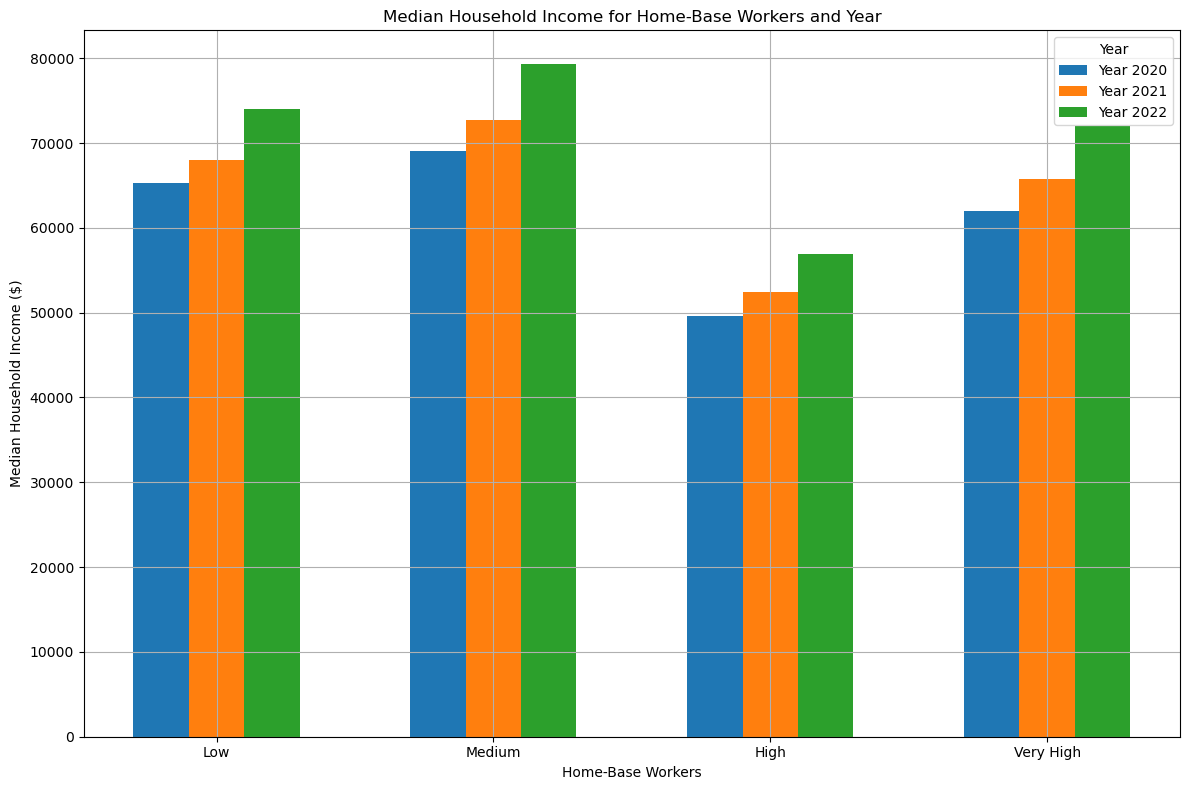

In [23]:
# Create a grouped bar chart: Home-based workers vs Median Household Income by Year
# Set up positions for the bars
bar_width = 0.2
home_worker_groups = grouped_df['Home-Base Workers'].unique()
num_groups = len(home_worker_groups)

# Create a position array for each year
x_pos = np.arange(num_groups)

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop over the years to create bars for each year
for i, year in enumerate(years):
    year_data = grouped_df[grouped_df['Year'] == year]
    # Create a bar for each worker group within the year
    plt.bar(x_pos + i * bar_width, year_data['B19013_001E'], bar_width, label=f'Year {year}')

# Customize the plot
plt.title('Median Household Income for Home-Base Workers and Year')
plt.xlabel('Home-Base Workers')
plt.ylabel('Median Household Income ($)')
plt.xticks(x_pos + bar_width, home_worker_groups)  # Set the x-tick labels to be the home worker groups
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()  # Ensures that everything fits without overlapping

# Show the plot
plt.show()

In [12]:
import os
import matplotlib.pyplot as plt

# Define the directory and file path
directory = 'C:\\Users\\jamie\\Desktop\\Project 1\\home-based-workers\\home-based-workers\\'
file_path = os.path.join(directory, 'home_based_workers_income_by_year.png')

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(directory):
    os.makedirs(directory)

# Now save the plot
plt.savefig(file_path, format='png', dpi=300)

# Show the plot (optional)
plt.show()


<Figure size 640x480 with 0 Axes>